# Data preparation

In [0]:
#ClinicalTrial Data
#Change year variable and run the file to see the results for that particular year
year=str(2021)

#modify="/FileStore/tables/clinicaltrial_"+year+".csv""
rdd= sc.textFile("dbfs:/FileStore/tables/clinicaltrial_"+year+".csv")
header_ct = rdd.first() 
rdd = rdd.filter(lambda row : row!= header_ct)
rdd.collect()

Out[33]: ['NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|',
 'NCT02758860|University of Roma La Sapienza|Active, not recruiting|Jun 2016|Sep 2020|Observational [Patient Registry]|Apr 2016|Diverticular Diseases,Diverticulum,Diverticulosis|',
 'NCT02757209|Consorzio Futuro in Ricerca|Completed|Apr 2016|Jan 2018|Interventional|Apr 2016|Asthma|Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate',
 'NCT02752438|Ankara University|Unknown status|May 2016|Jul 2017|Observational [Patient Registry]|Apr 2016|Hypoventilation|',
 'NCT02753543|

In [0]:
#Mesh Data
rddmesh= sc.textFile("dbfs:/FileStore/tables/mesh.csv")
header_mesh = rddmesh.first() 
rddmesh = rddmesh.filter(lambda row : row!= header_mesh)
rddmesh.collect()

Out[22]: ['Calcimycin,D03.633.100.221.173',
 'A-23187,D03.633.100.221.173',
 'Temefos,D02.705.400.625.800',
 'Temefos,D02.705.539.345.800',
 'Temefos,D02.886.300.692.800',
 'Abate,D02.705.400.625.800',
 'Abate,D02.705.539.345.800',
 'Abate,D02.886.300.692.800',
 'Difos,D02.705.400.625.800',
 'Difos,D02.705.539.345.800',
 'Difos,D02.886.300.692.800',
 'Abattoirs,J01.576.423.200.700.100',
 'Abattoirs,J03.540.020',
 'Abbreviations as Topic,L01.559.598.400.556.131',
 'Acronyms as Topic,L01.559.598.400.556.131',
 'Abdomen,A01.923.047',
 '"Abdomen, Acute",C23.888.592.612.054.200',
 '"Abdomen, Acute",C23.888.821.030.249',
 'Abdominal Injuries,C26.017',
 'Abdominal Neoplasms,C04.588.033',
 'Abdominal Muscles,A02.633.567.050',
 'Cremaster Muscle,A02.633.567.050',
 'Pyramidalis Muscle,A02.633.567.050',
 'Quadratus Abdominis,A02.633.567.050',
 'Transversus Abdominis,A02.633.567.050',
 'Abducens Nerve,A08.800.800.120.030',
 'Abelson murine leukemia virus,B04.613.807.375.525.020',
 'Abelson murine 

In [0]:
#Pharma Data
rddpharma= sc.textFile("dbfs:/FileStore/tables/pharma.csv")
header_pharma = rddpharma.first() 
rddpharma = rddpharma.filter(lambda row : row!= header_pharma)
rddpharma.collect()

Out[23]: ['"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s carotid, biliary and peripheral vascular products.","federal","agency action","Justice Department Civil Division","civil","","","","","","","","","","","","USA","Illinois","publicly traded","ABT","pharmaceuticals","pharmaceuticals","https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians",""',
 '"Abbott Laboratories Inc.","AbbVie","$1,500,000,000","$0","$1,500,000,000","2012","20120507","healthcare-related offenses","off-label or unapproved promotion of medical products","","Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to

# Problem Statement 1
Find the number of distinct studies in the dataset.

In [0]:
#1
rdd.count()

Out[24]: 387261

# Problem Statement 2
List all the types (as contained in the Type column) of studies in the dataset along with
the frequencies of each type ordered from most frequent to least frequent.

In [0]:
#2
rdd.map(lambda x:x.split('|')[5]).map(lambda x:(x,1)).reduceByKey(lambda v1,v2:v1+v2).sortBy(lambda x: x[1],False ).collect()

Out[25]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

# Problem Statement 3
Select top 5 conditions (from Conditions) with their frequencies.

In [0]:
#3
type=rdd.map(lambda x:x.split('|')[7]).flatMap(lambda x:x.split(",") ).filter(lambda x:len(x)>0).map(lambda x:(x,1)).reduceByKey(lambda v1,v2:v1+v2).sortBy(lambda x: x[1],False )
type.take(5)

Out[26]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

# Problem Statement 4
Select the 5 most frequent roots.

In [0]:
#4
rdd_code=rddmesh.filter(lambda x: '"' not in(x)).map(lambda y:y.split(',')).map(lambda y:(y[0],y[1].split(".")[0]))
rdd1=type.join(rdd_code)
from operator import add
rdd1.map(lambda y:y[1]).map(lambda y:(y[1],y[0])).reduceByKey(add).sortBy(lambda x: x[1],False ).take(5)

Out[27]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

# Problem Statement 5
Find the 10 most common sponsors that are not pharmaceutical companies, along with the number
of clinical trials they have sponsored.

In [0]:
#5
parent_companyrdd=rddpharma.map(lambda x:x.split('","'))
companyrdd=parent_companyrdd.map(lambda x: x[1]).map(lambda s: s.replace('"','')).map(lambda x:(x,1)).distinct()
company_trials=rdd.map(lambda x:x.split('|')[1]).map(lambda x:(x,1)).reduceByKey(lambda v1,v2:v1+v2)

joinrdd=company_trials.leftOuterJoin(companyrdd).filter(lambda x:x[1][1]==None)
joinrdd.map(lambda x: (x[0],x[1][0])).sortBy(lambda x:x[1],False).take(10)

Out[28]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

# Problem Statement 6
Plot number of completed studies each month in a given year.

In [0]:
#6
rdd_c=rdd.map(lambda x:x.split('|')).filter(lambda x : x[2]== "Completed").filter(lambda x: x[4].endswith(''+year+''))
rddcc=rdd_c.map(lambda x:x[4]).map(lambda x:(x,1)).reduceByKey(lambda v1,v2:v1+v2)
from datetime import datetime
rddcc=rddcc.sortBy(lambda x: datetime.strptime(x[0],"%b %Y"))
rddcc.collect()

Out[31]: [('Jan 2021', 1131),
 ('Feb 2021', 934),
 ('Mar 2021', 1227),
 ('Apr 2021', 967),
 ('May 2021', 984),
 ('Jun 2021', 1094),
 ('Jul 2021', 819),
 ('Aug 2021', 700),
 ('Sep 2021', 528),
 ('Oct 2021', 187)]

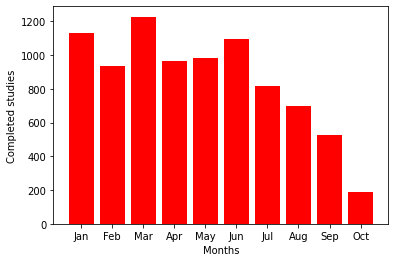

In [0]:
import matplotlib.pyplot as plt

x = rddcc.map(lambda x: x[0]).map(lambda y:y.split(' ')[0]).collect()
y = rddcc.map(lambda x: x[1]).collect()
plt.bar(x,y,align='center', facecolor='red') # A bar chart
plt.xlabel('Months')
plt.ylabel('Completed studies')

plt.show()